In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('.\Desktop\Python code\data_set\Time_Series_ARIMA\perrin-freres-monthly-champagne-.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df=df.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72':'Sales'})

In [5]:
df.head(5)

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df.drop(105, axis=0,inplace=True)

In [7]:
df.drop(106, axis=0,inplace=True)

In [8]:
df.tail(5)

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [9]:
#convert Month form str to datetime
df['Month']=pd.to_datetime(df['Month'])

In [10]:
df.set_index('Month', inplace=True)

In [11]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


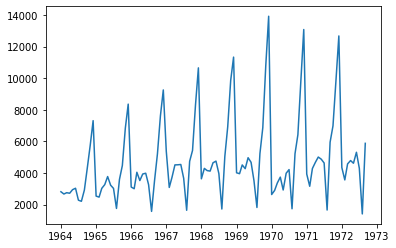

In [12]:
plt.plot(df)

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
def adfuller_test(data):
    test_result=adfuller(data)
    dfop= pd.Series(test_result[0:4],index=['Test Statistic','p-Values','Lags_Used','No. Obs Used'])
    for key,value in test_result[4].items():
        dfop['Critical Value (%s)'%key]=value
    
    print(dfop)    

In [15]:
adfuller_test(df['Sales'])

Test Statistic          -1.833593
p-Values                 0.363916
Lags_Used               11.000000
No. Obs Used            93.000000
Critical Value (1%)     -3.502705
Critical Value (5%)     -2.893158
Critical Value (10%)    -2.583637
dtype: float64


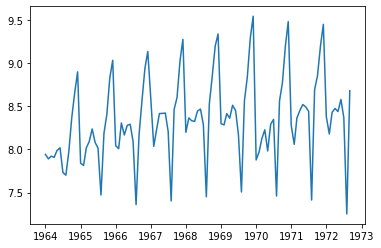

In [16]:
sale_log = np.log(df['Sales'])
plt.plot(sale_log)

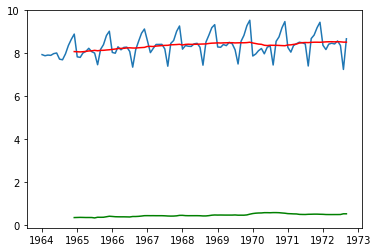

In [17]:
sale_MA=sale_log.rolling(window=12).mean()
sale_STD=sale_log.rolling(window=12).std()
plt.plot(sale_log)
plt.plot(sale_MA, color='red')
plt.plot(sale_STD, color="green")

In [18]:
sale_MA=sale_MA.dropna()
adfuller_test(sale_MA)

Test Statistic          -2.404024
p-Values                 0.140604
Lags_Used                3.000000
No. Obs Used            90.000000
Critical Value (1%)     -3.505190
Critical Value (5%)     -2.894232
Critical Value (10%)    -2.584210
dtype: float64


In [19]:
sale_STD=sale_STD.dropna()
adfuller_test(sale_STD)

Test Statistic          -1.497810
p-Values                 0.534595
Lags_Used                1.000000
No. Obs Used            92.000000
Critical Value (1%)     -3.503515
Critical Value (5%)     -2.893508
Critical Value (10%)    -2.583824
dtype: float64


In [20]:
# df['sale_dif_r1']=df['Sales'].rolling(window=12).std()
# df['sale_dif_r12']=df['Sales'].rolling(window=12).mean()
# plt.plot(df['sale_dif_r1'], color='red')
# plt.plot(df['sale_dif_r12'], color="green")

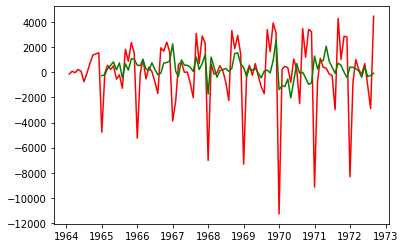

In [21]:
df['sale_dif_1']=df['Sales']-df['Sales'].shift(1)
df['sale_dif_12']=df['Sales']-df['Sales'].shift(12)
plt.plot(df['sale_dif_1'], color='red')
plt.plot(df['sale_dif_12'], color="green")

In [22]:
adfuller_test(df['sale_dif_12'].dropna())

Test Statistic         -7.626619e+00
p-Values                2.060580e-11
Lags_Used               0.000000e+00
No. Obs Used            9.200000e+01
Critical Value (1%)    -3.503515e+00
Critical Value (5%)    -2.893508e+00
Critical Value (10%)   -2.583824e+00
dtype: float64


In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

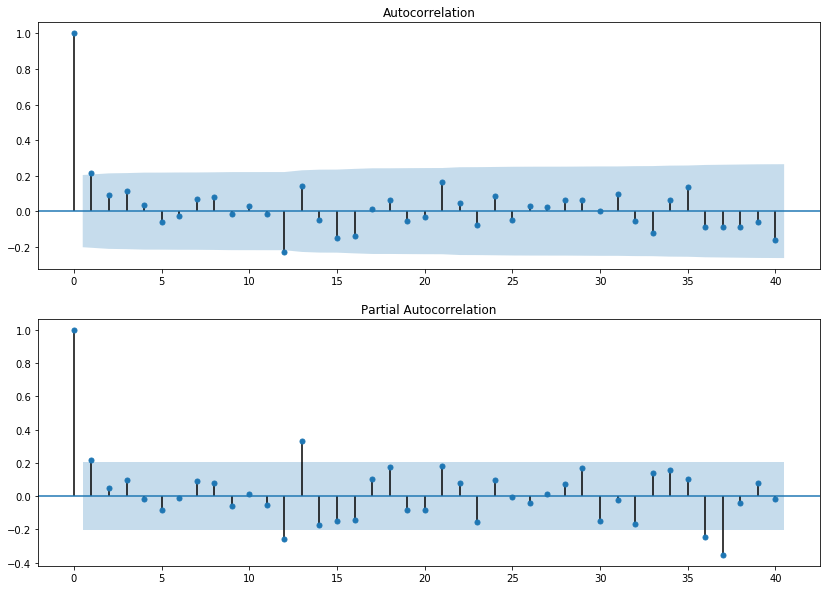

In [24]:
fig = plt.figure(figsize=(14,10))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['sale_dif_12'].dropna(),lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['sale_dif_12'].dropna(),lags=40,ax=ax2)

In [25]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [26]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Wed, 20 Apr 2022   AIC                           1910.251
Time:                        20:42:08   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7842     12.405      1.837      0.069      -1.530      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

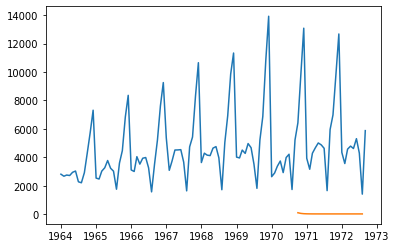

In [28]:
df['forecast']=model_fit.predict(start=81,end=103,dynamic=True)
plt.plot(df[['Sales','forecast']])

In [29]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
result=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


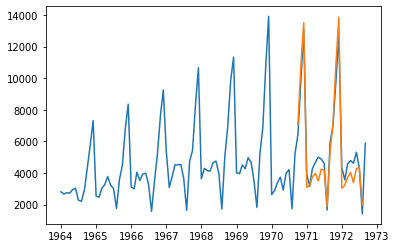

In [30]:
df['forecast']=result.predict(start=81,end=103,dynamic=True)
plt.plot(df[['Sales','forecast']])

In [31]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [32]:
future_dates[-1]

Timestamp('1974-08-01 00:00:00')

In [33]:
#future_datest_df=pd.DataFrame(index=future_dates[0:],columns=df.columns)

In [34]:
future_df=pd.concat([df,future_datest_df])

NameError: name 'future_datest_df' is not defined

In [ ]:
future_df['forecast'] = result.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 